# Introduction
In this project, we explored various **machine learning algorithms** and techniques to predict credit card fraud. The target variable was highly unbalanced, making it a challenging problem. To handle this issue, we applied **Undersampling, Subsampling, and Synthetic Data Generation** techniques.

Additionally, we evaluated the performance of various algorithms, including **Decision Tree, Logistic Regression, KNN, GaussianNB, BernoulliNB, Random Forest, XGB, Gradient Boosting, LGBM, Support Vector Machine, and Multilayer Perceptron**.

We compared the performance of these algorithms using **precision, recall, f1, and roc_auc_score** metrics. Our project workflow involved **data exploration**, **preprocessing**, and **modeling**, along with techniques for handling the unbalanced target variable. We also conducted **hyperparameter tuning** for the best-performing algorithms.

Overall, this project demonstrates the effectiveness of various machine learning algorithms and techniques in addressing the challenge of credit card fraud detection.

## WorkFlow
Our project workflow consisted of the following stages:

1. **Data Exploration:** In this stage, we performed univariate and bivariate analytics to gain a better understanding of the data.
2. **Preprocessing:** This stage involved data cleaning, feature selection, and transformation to prepare the data for modeling.
3. **Modeling:** We applied various machine learning algorithms to build models and handle the unbalanced target variable. We also used techniques such as Undersampling, Subsampling, and Synthetic Data Generation.
4. **Comparing Performance Metrics:** We compared the performance of different algorithms using metrics such as precision, recall, f1, and roc_auc_score. This stage involved testing various algorithms and conducting hyperparameter tuning to optimize their performance.
5. **Optimized Algorithm Performance:** After hyperparameter tuning, we evaluated the performance of the optimized algorithms.
6. **Conclusion:** In the final stage, we drew conclusions based on the results obtained and discussed the effectiveness of the various techniques and algorithms used in this project.

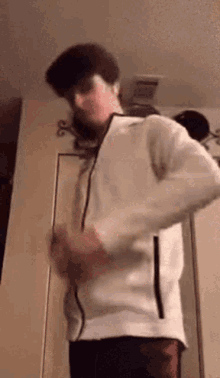

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='crest')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Credit Card Fraud Detection/Input/creditcard.csv')

# Data Exploratory
In the Data Exploratory section, I will analyze the dataset using statistical and visualization techniques to gain insights into the data and identify potential problems. This phase is crucial for identifying potential biases and ensuring the model is trained on a reliable dataset.

## First Look

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As seen in the data time, amount and class are the only categories that we can, the others from V1 to V28 had their dimensionality reduced through PCA and will also not need to go through any standardization processing, because they already went through PCA 

## Univariate
In the Univariate Analysis section, I will explore each variable in the dataset individually

### Target

<Axes: xlabel='Class', ylabel='count'>

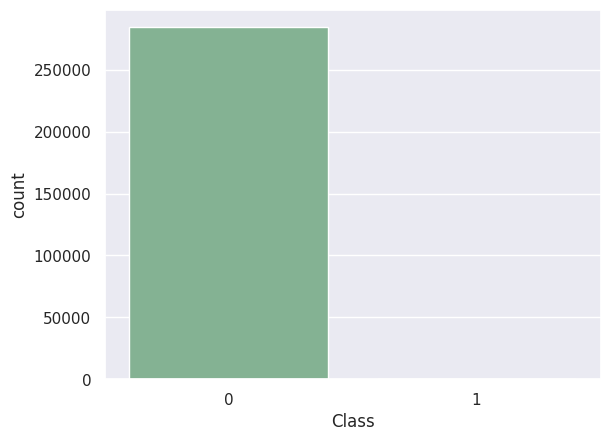

In [6]:
sns.countplot(data=df, x='Class')

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

We see a totally unbalanced target, in such cases we can do some tratives not to bias our model, some approaches to avoid unbalanced data like **oversampling**, **undersampling** or **synthetic data generation**. But in this project, I will use the **subsampling** method and the majority class values will be reduced.

In [9]:
df['Class'] = df['Class'].astype('category')

### Time

<Axes: xlabel='Time'>

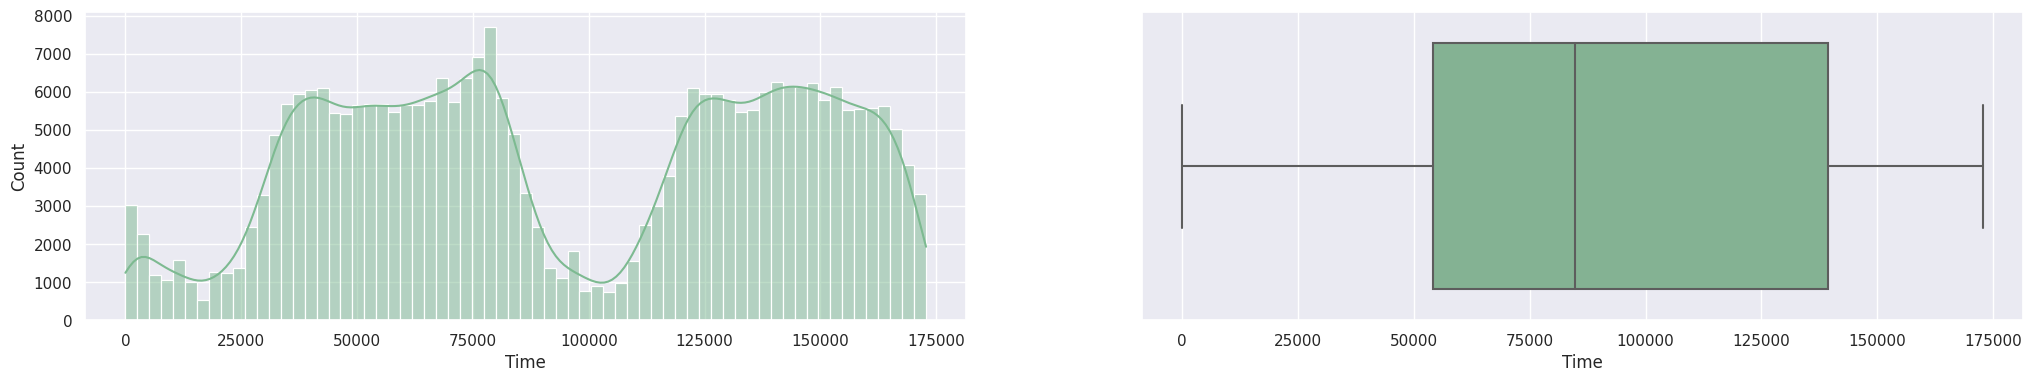

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.histplot(data=df, x='Time', kde=True, ax=ax[0])
sns.boxplot(data=df, x='Time', ax=ax[1])

### Amount

<Axes: xlabel='Amount'>

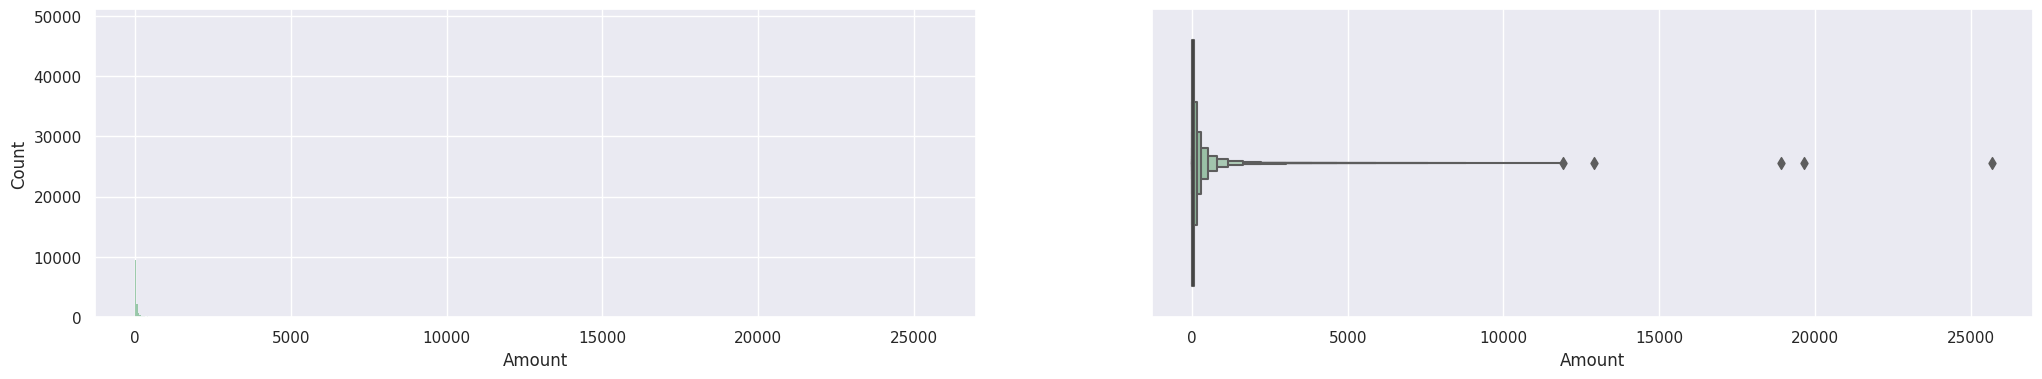

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.histplot(data=df, x= 'Amount', ax=ax[0])
sns.boxenplot(data=df, x= 'Amount', ax=ax[1])

Looking at the `Time` and `Amount` we see the need to standardize the data Standardization will be used for the `Time` and `Amount` features to 0 mean and 1 std. (Standard Scaler). This method preserves the shape of the data and helps to construct features that have similar ranges to each other.

### Hour

Let's create a `Hour` feature that will help us understand the relationship with `Time` and `Amount` by doing the following conversion

In [12]:
df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))

<Axes: xlabel='Hour'>

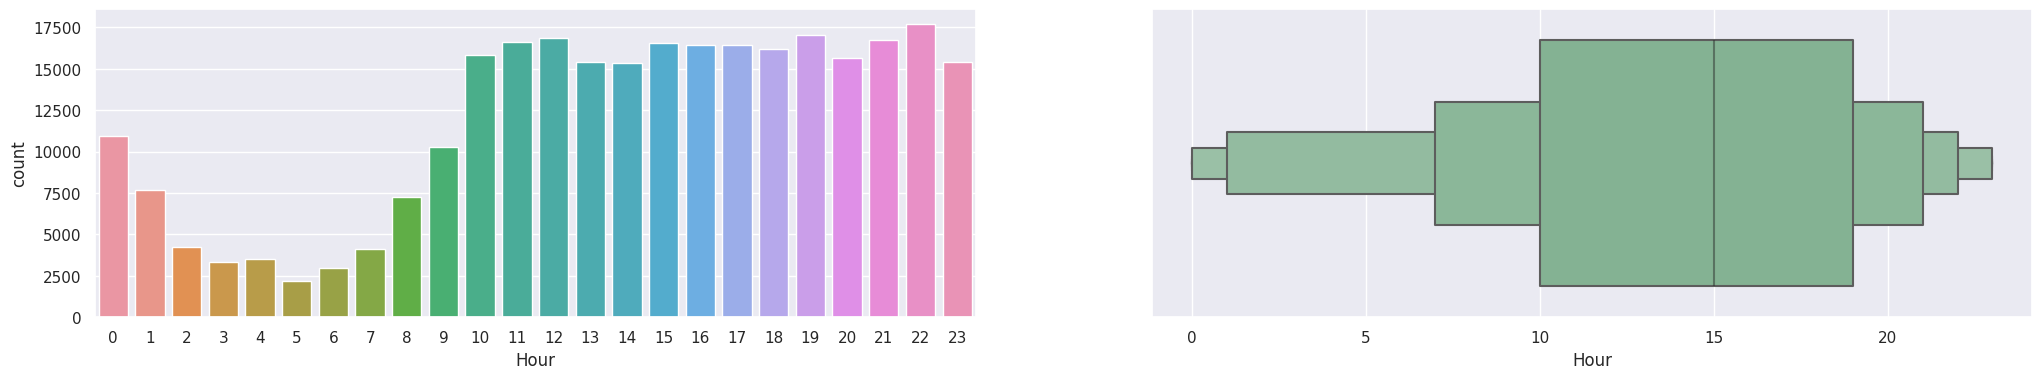

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.countplot(data=df, x='Hour', ax=ax[0])
sns.boxenplot(data=df, x='Hour', ax=ax[1])

## Bivariate
In the Bivariate Analysis section, I will explore the relationship between two variables in the dataset

### Hour by Class

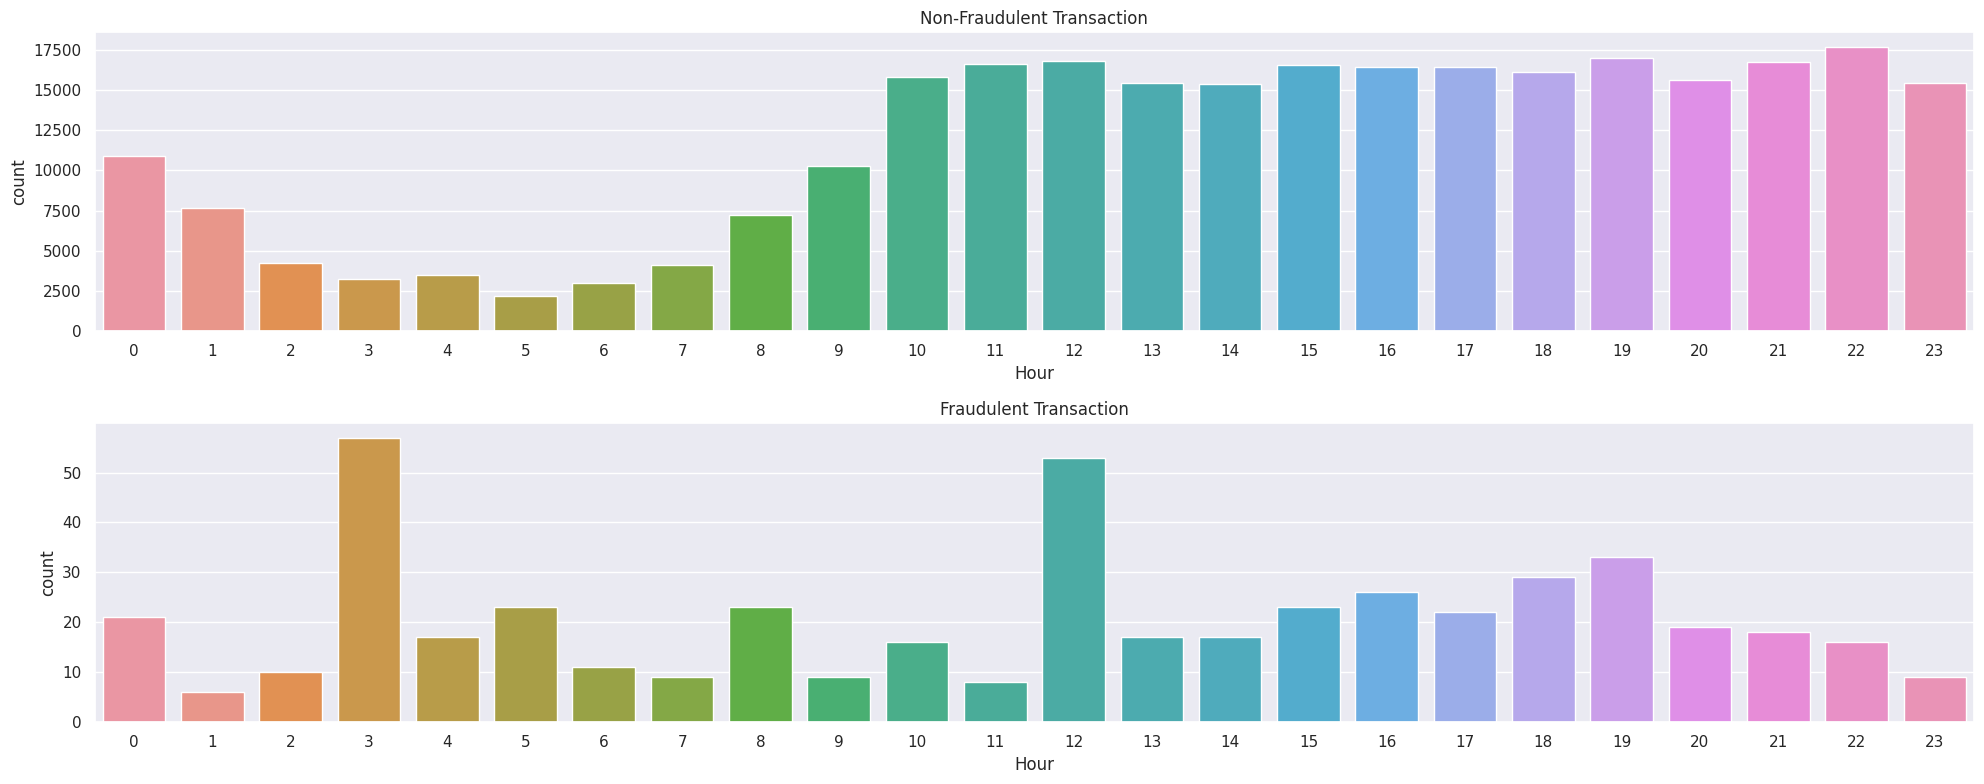

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.countplot(data=df[ df.Class == 0 ], x= 'Hour', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.countplot(data=df[ df.Class == 1 ], x= 'Hour', ax=axs[1])

plt.tight_layout()

In [15]:
df.groupby('Class')['Hour'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,14.128924,6.229159,0.0,10.0,15.0,19.0,23.0
1,492.0,11.621951,6.683975,0.0,5.0,12.0,18.0,23.0


**Non-Fraudulent Transaction**
- The number of non-fraudulent transactions from 9 AM onwards is between 1500 and 17500, which is an unstable period where most transactions occur. And its low point is from 2 to 7, the period with the lowest number of transactions.

**Fraudulent Transaction**
- We have some peaks that are 3 and 12 are the periods where most frauds occur, standing out from the others. with the lowest number of frauds at 1.

### Amount By Class

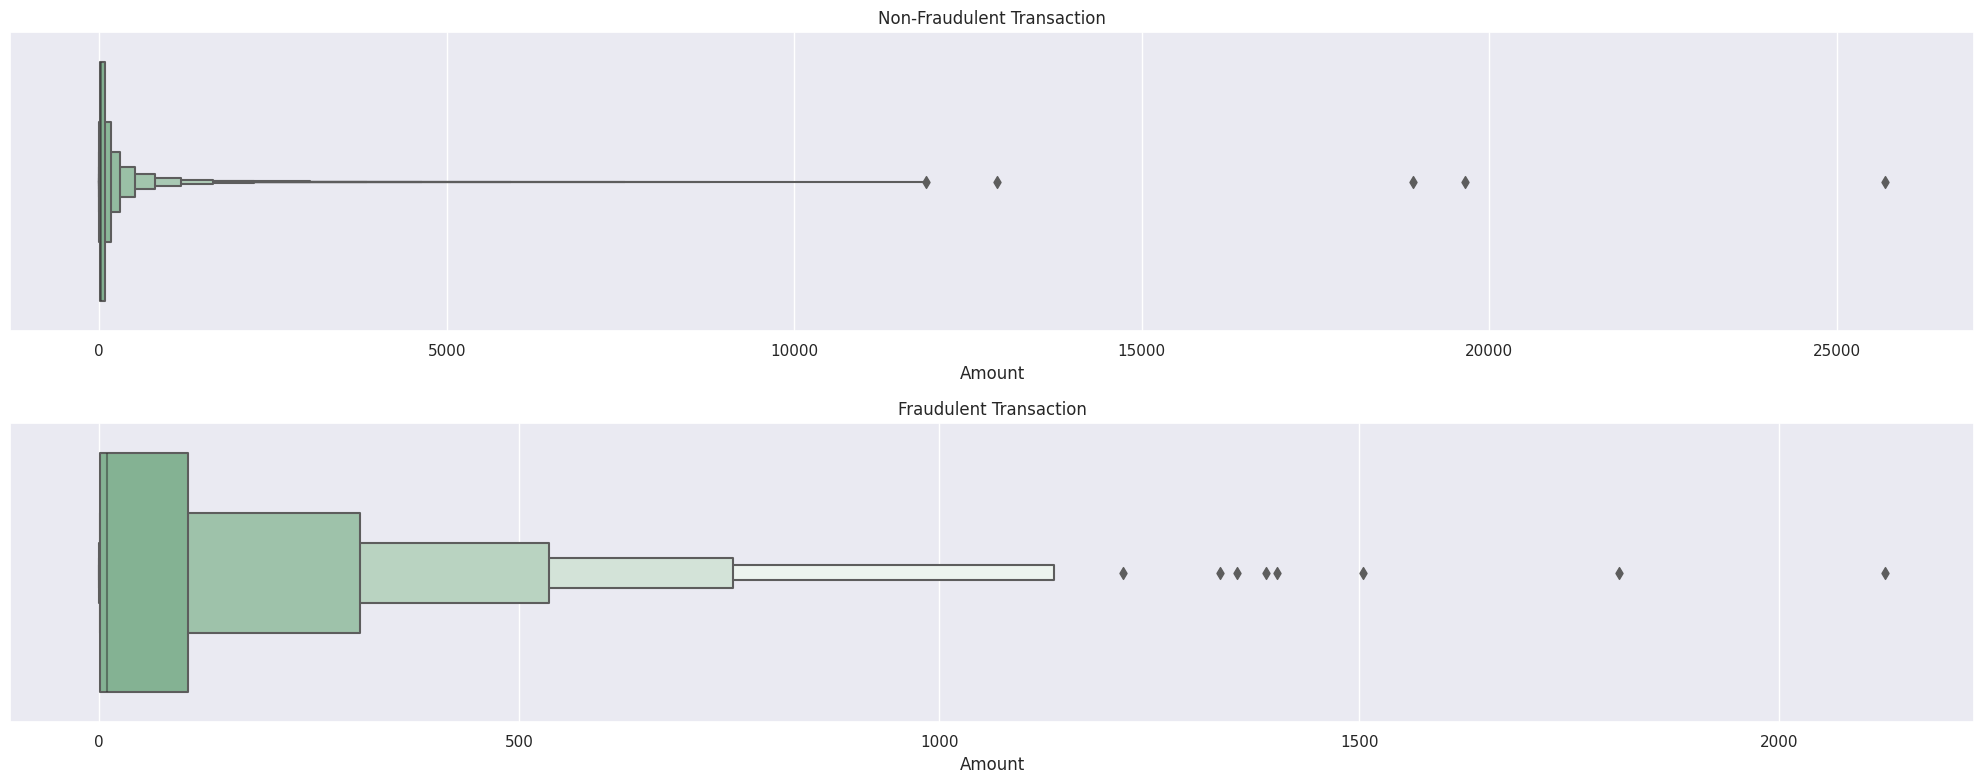

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.boxenplot(data=df[ df.Class == 0 ], x= 'Amount', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.boxenplot(data=df[ df.Class == 1 ], x= 'Amount', ax=axs[1])

plt.tight_layout()

In [17]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


The main observation we can make is that the **Non-Fraulent Transaction** is ranging from -0.35 to 102.36, while the **Fraudulent Transaction** is ranging from -0.35 to 8.14.

### Hour and Amount by Class

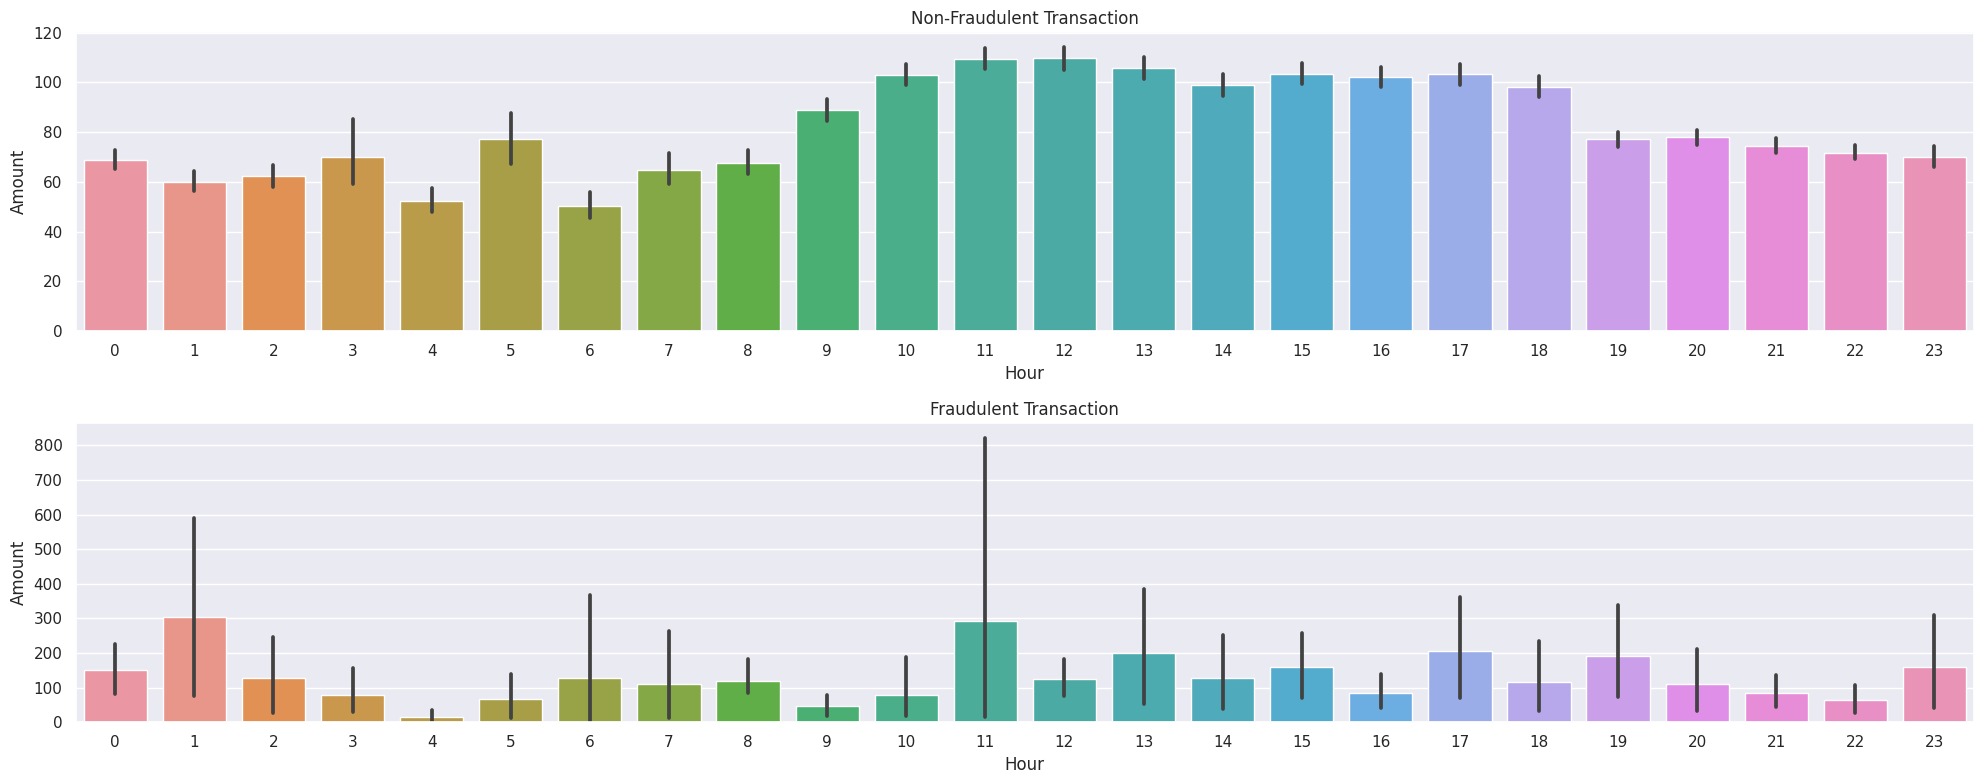

In [18]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.barplot(data=df[ df.Class == 0 ], x= 'Hour', y='Amount', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.barplot(data=df[ df.Class == 1 ], x= 'Hour', y='Amount', ax=axs[1])

plt.tight_layout()

**Non-Fraudelent Transction**
- Has a stable `Amount` during all `Hours`, with lowest values at 4 and 6, and highest values at 11 and 12, has a higher constancy of `Amount` in the interval 9 to 18

**Fraudelent Transction**
- Highest `Amount` indices at 11 and 1, with a very different low at 4.

**Conclusion**
The `Amount` value in the **Non-Fraudulent Transaction** ranges from 0 to about 110, while the **Fraudulent Transaction** ranges from 0 to 800 *(this range I am talking about the error bar and not the maximum value)*

### Correlation

Remove a resource `Hour` to continue an analysis

In [19]:
df = df.drop('Hour', axis=1)

In [20]:
corr = df.corr(method='pearson')

<Axes: >

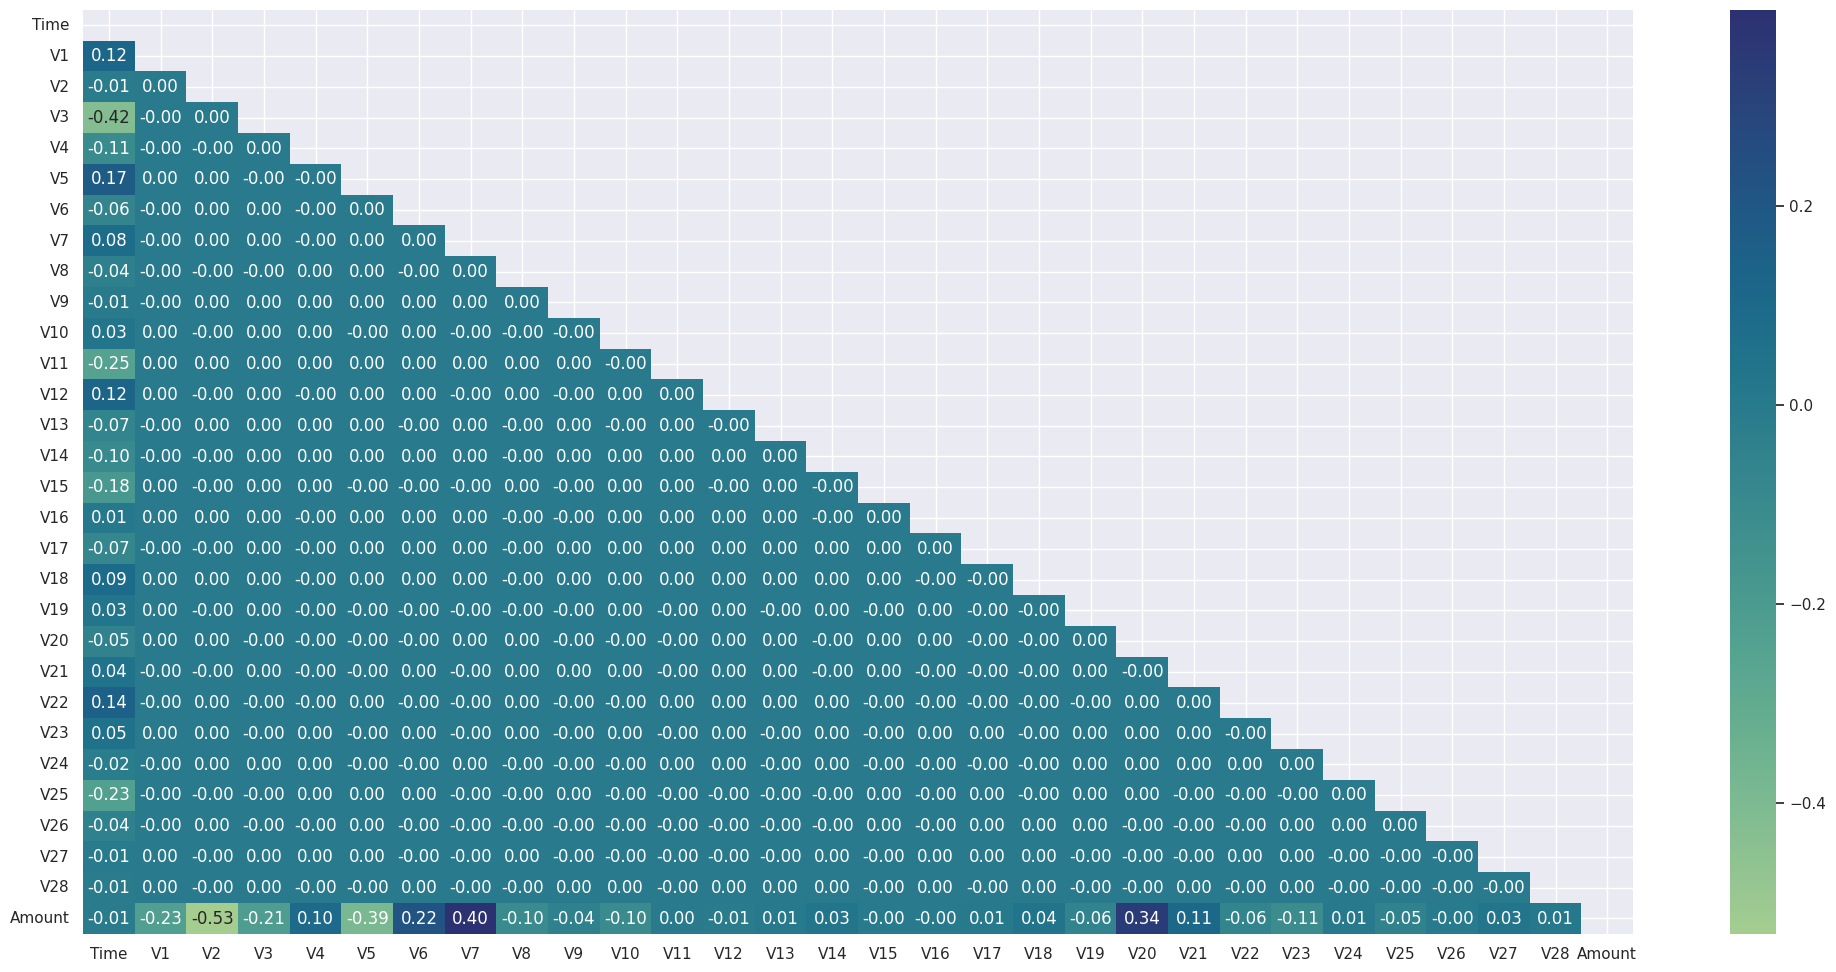

In [21]:
plt.figure(figsize=(25,12))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            cmap='crest', 
            annot=True,
            fmt='.2f', 
            mask=mask)

The strongest correlation we have is -0.53 and then 0.40, followed by -0.39 and 0.34, these are not strong correlations to the point that we need to eliminate them, here we will not have a high correlation problem 

# Pre-processing 
Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
df[['Time', 'Amount']] = StandardScaler().fit_transform(df[['Time', 'Amount']])

# Modeling

## Techniques for Handling Unbalanced Target
In this project, the target variable is unbalanced, which can negatively impact the machine learning model's performance. To address this issue, I used several techniques, including **Undersampling**, **Subsampling**, and **Synthetic Data Generation**.

In **Undersampling**, I randomly selected a subset of the majority class to balance the class distribution. In **Subsampling**, I created several subsets of the majority class and combined them with the minority class to balance the distribution. In **Synthetic Data Generation**, I used techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic data points for the minority class.

By using these techniques, I can improve the model's performance and ensure that the algorithm is trained on a balanced dataset.

In [23]:
def re_sampling(x):
  df_nonfraud = df[ df.Class == 0 ].sample(x, random_state=0)
  df_fraud  = df[ df.Class == 1 ]

  df_gen = pd.concat([df_nonfraud, df_fraud]).sample(frac=1)
  X_gen = df_gen.drop('Class', axis = 1)
  y_gen = df_gen.Class
  return X_gen, y_gen

### Undersampling

In [24]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [25]:
x_sample = int(492 * 95 / 5) # 95% out of 492 where 492 represents 5% percent

X_under, y_under = re_sampling(x_sample)

<Axes: xlabel='Class', ylabel='count'>

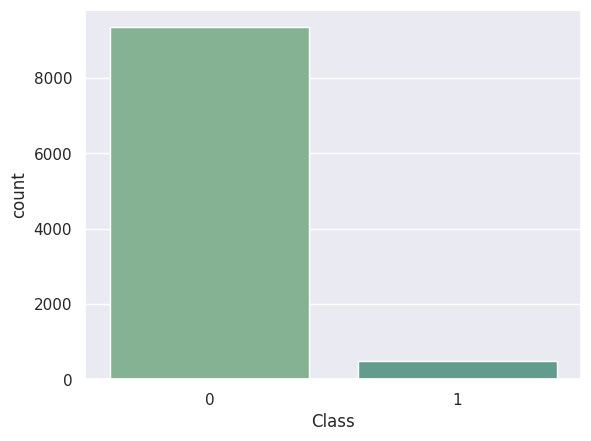

In [26]:
sns.countplot(x=y_under)

In [27]:
y_under.value_counts()

0    9348
1     492
Name: Class, dtype: int64

In [28]:
y_under.value_counts(normalize=True)

0    0.95
1    0.05
Name: Class, dtype: float64

### Subsampling

In [29]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [30]:
x_sample = int(492 * 80 / 20) # 80% out of 492 where 492 represents 20% percent

X_sub, y_sub = re_sampling(x_sample)

<Axes: xlabel='Class', ylabel='count'>

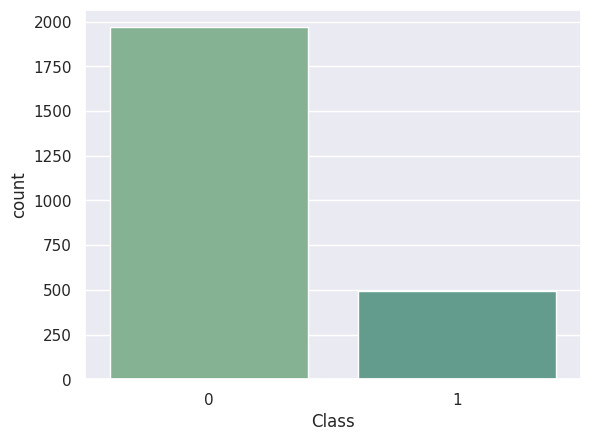

In [31]:
sns.countplot(x=y_sub)

In [32]:
y_sub.value_counts()

0    1968
1     492
Name: Class, dtype: int64

In [33]:
y_sub.value_counts(normalize=True)

0    0.8
1    0.2
Name: Class, dtype: float64

### Synthetic Data Generation

In [34]:
X_gen, y_gen = re_sampling( 1000 )

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_sdg, y_sdg = smote.fit_resample(X_gen, y_gen)

<Axes: xlabel='Class', ylabel='count'>

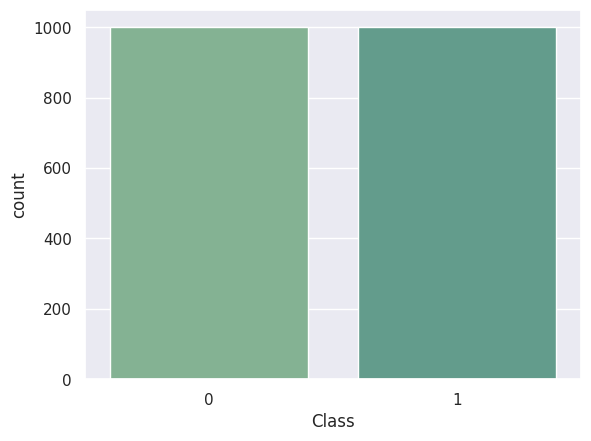

In [35]:
sns.countplot(x=y_sdg)

In [36]:
y_sdg.value_counts()

0    1000
1    1000
Name: Class, dtype: int64

In [37]:
y_sdg.value_counts(normalize=True)

0    0.5
1    0.5
Name: Class, dtype: float64

# Comparing Performance Metrics
I applied several machine learning algorithms to the Credit Card Fraud Detection dataset, including **Decision Tree**, **Logistic Regression**, **KNN**, **GaussianNB**, **BernoulliNB**, **Random Forest**, **XGB**, **Gradient Boosting**, **LGBM**, **Support Vector Machine**, and **Multilayer Perceptron**.

To evaluate each algorithm's performance, I used the **`cross_validate`** function with **`RepeatedKFold`** to perform repeated k-fold cross-validation. **`cross_validate`** function computes the average and standard deviation of the specified metrics, such as **precision**, **recall**, **f1-score**, and **ROC AUC score**, over the different folds.

I evaluated each metric for each algorithm to determine which one performs better on this specific dataset. This process allows me to select the best-performing algorithm for the next phase of the project.

## Testing Various Algorithms
- `precision` measures the proportion of true positive predictions among all positive predictions. 
- `recall` measures the proportion of true positive predictions among all actual positive instances. 
- `f1-score` is the harmonic mean of `precision` and `recall`. 
- `roc_auc` is the area under the receiver operating characteristic curve, which shows the trade-off between true positive rate and false positive rate. 
- `run_time` measures the time it takes for the model to train and make predictions. 
- Finally, the mean_metrics is the average of `precision`, `recall`, and `f1-score`.

In [38]:
import time
from sklearn.model_selection import RepeatedKFold, cross_validate, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [39]:
algorithms = {
    'DT': DecisionTreeClassifier(random_state=0),
    'LR': LogisticRegression(random_state=0, max_iter=500),
    'KNN': KNeighborsClassifier(),
    'GauNB': GaussianNB(),
    'BerNB': BernoulliNB(),
    'RF': RandomForestClassifier(random_state=0),
    'XGB': XGBClassifier(random_state=0),
    'GradB': GradientBoostingClassifier(random_state=0),
    'LGBM': LGBMClassifier(random_state=0),
    'SVC': SVC(random_state=0),
    'MLPC': MLPClassifier(random_state=0, max_iter=1500) 
}

In [40]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

scoring = {
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0),
    'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr')
}

In [41]:
def test_algorithms(X,y):
  result = pd.DataFrame()
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
    
  for key, algorithm in algorithms.items():
    start_time = time.time()
    print(f'{key}...', end = '')
    model = algorithm

    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_estimator =True)

    new_row = {
        'Algorithm': key,
        'precision': round(np.mean(cv_results['test_precision']), 5),
        'recall': round(np.mean(cv_results['test_recall']), 5),
        'f1': round(np.mean(cv_results['test_f1']), 5),
        'roc_auc': round(np.mean(cv_results['test_roc_auc']), 5),
        'run_time': round((time.time() - start_time) / 60, 2),
        'model': cv_results['estimator'][0]
      }
    result = pd.concat([result, pd.Series(new_row)], axis=1)
    print(f'finished!!! {round((time.time() - start_time) / 60, 2)} min(s).')
  return result.transpose().sort_values(by='f1', ascending=False)

In [42]:
# Undersampling
result_under = test_algorithms(X_under, y_under)

DT...finished!!! 0.14 min(s).
LR...finished!!! 0.02 min(s).
KNN...finished!!! 0.04 min(s).
GauNB...finished!!! 0.0 min(s).
BerNB...finished!!! 0.01 min(s).
RF...finished!!! 1.6 min(s).
XGB...finished!!! 0.89 min(s).
GradB...finished!!! 2.68 min(s).
LGBM...finished!!! 0.14 min(s).
SVC...finished!!! 0.13 min(s).
MLPC...finished!!! 3.79 min(s).


In [43]:
# Subsampling
result_sub = test_algorithms(X_sub, y_sub)

DT...finished!!! 0.02 min(s).
LR...finished!!! 0.01 min(s).
KNN...finished!!! 0.01 min(s).
GauNB...finished!!! 0.0 min(s).
BerNB...finished!!! 0.0 min(s).
RF...finished!!! 0.28 min(s).
XGB...finished!!! 0.2 min(s).
GradB...finished!!! 0.61 min(s).
LGBM...finished!!! 0.09 min(s).
SVC...finished!!! 0.01 min(s).
MLPC...finished!!! 1.46 min(s).


In [44]:
# Synthetic Data Generation
result_sdg = test_algorithms(X_sdg, y_sdg)

DT...finished!!! 0.02 min(s).
LR...finished!!! 0.01 min(s).
KNN...finished!!! 0.03 min(s).
GauNB...finished!!! 0.0 min(s).
BerNB...finished!!! 0.01 min(s).
RF...finished!!! 0.19 min(s).
XGB...finished!!! 0.17 min(s).
GradB...finished!!! 0.48 min(s).
LGBM...finished!!! 0.08 min(s).
SVC...finished!!! 0.01 min(s).
MLPC...finished!!! 1.26 min(s).


In [45]:
result_under['Method'] = 'Undersampling'
result_sub['Method'] = 'Subsampling'
result_sdg['Method'] = 'Synthetic'

result = pd.concat([result_under, result_sub, result_sdg], axis=0)

In [46]:
result['run_time'].sum()

14.389999999999993

In [47]:
metrics = ['precision', 'recall', 'f1', 'roc_auc']
result['mean_metrics'] = result[metrics].mean(axis=1)

In [48]:
result.set_index([ 'Method', 'Algorithm' ]).sort_values(by='f1', ascending=False).drop('model', axis=1)

precision   recall       f1  roc_auc run_time  \
Method        Algorithm                                                 
Undersampling LGBM         0.9921  0.99214  0.99186  0.92736     0.14   
              XGB         0.99199  0.99204  0.99176  0.92729     0.89   
              RF          0.99176  0.99177  0.99145  0.92199      1.6   
              KNN         0.99135  0.99136    0.991   0.9181     0.04   
              SVC         0.99104  0.99102  0.99061  0.91285     0.13   
              LR          0.99068  0.99079  0.99045  0.91891     0.02   
              MLPC        0.99049  0.99062  0.99042  0.93073     3.79   
              GradB       0.98901  0.98923  0.98897  0.92086     2.68   
              BerNB        0.9879  0.98797  0.98729   0.8874     0.01   
              DT          0.98374  0.98323  0.98343  0.92157     0.14   
              GauNB       0.97446  0.96843  0.97058  0.91294      0.0   
Subsampling   LGBM        0.97095  0.97073  0.97008  0.93443     0.09   
              KNN          0.9711  0.97073  0.97003   0.9327     0.01   
              RF          0.97083  0.97033  0.96954  0.93017     0.28   
              MLPC        0.96949  0.96951  0.96911  0.93986     1.46   
              XGB         0.96932  0.96924  0.96861  0.93341      0.2   
              LR          0.96911  0.96911  0.96855  0.93481     0.01   
              GradB       0.96852  0.96856  0.96796  0.93352     0.61   
Synthetic     LGBM        0.96822  0.96767  0.96766  0.96769     0.08   
              MLPC        0.96654  0.96633  0.96633  0.96623     1.26   
Subsampling   SVC         0.96778  0.96721  0.96629  0.92367     0.01   
Synthetic     XGB         0.96629  0.96583  0.96583  0.96594     0.17   
              RF          0.96093  0.95967  0.95965  0.95969     0.19   
Subsampling   BerNB       0.96055  0.95894  0.95717   0.8993      0.0   
Synthetic     KNN         0.95692  0.95667  0.95667  0.95679     0.03   
              GradB       0.95285    0.952  0.95198  0.95213     0.48   
Subsampling   GauNB       0.95165  0.95203  0.95167  0.91748      0.0   
              DT          0.94807  0.94715  0.94739  0.92174     0.02   
Synthetic     LR          0.94447    0.943  0.94297   0.9431     0.01   
              SVC         0.94095  0.93667  0.93652  0.93666     0.01   
              DT           0.9349   0.9345  0.93449  0.93446     0.02   
              GauNB       0.92107  0.91483  0.91453  0.91487      0.0   
              BerNB        0.9203  0.90617   0.9054  0.90625     0.01   

                         mean_metrics  
Method        Algorithm                
Undersampling LGBM           0.975865  
              XGB            0.975770  
              RF             0.974243  
              KNN            0.972952  
              SVC            0.971380  
              LR             0.972707  
              MLPC           0.975565  
              GradB          0.972017  
              BerNB          0.962640  
              DT             0.967993  
              GauNB          0.956603  
Subsampling   LGBM           0.961547  
              KNN            0.961140  
              RF             0.960217  
              MLPC           0.961993  
              XGB            0.960145  
              LR             0.960395  
              GradB          0.959640  
Synthetic     LGBM           0.967810  
              MLPC           0.966357  
Subsampling   SVC            0.956237  
Synthetic     XGB            0.965972  
              RF             0.959985  
Subsampling   BerNB          0.943990  
Synthetic     KNN            0.956762  
              GradB          0.952240  
Subsampling   GauNB          0.943207  
              DT             0.941088  
Synthetic     LR             0.943385  
              SVC            0.937700  
              DT             0.934588  
              GauNB          0.916325  
              BerNB          0.909530

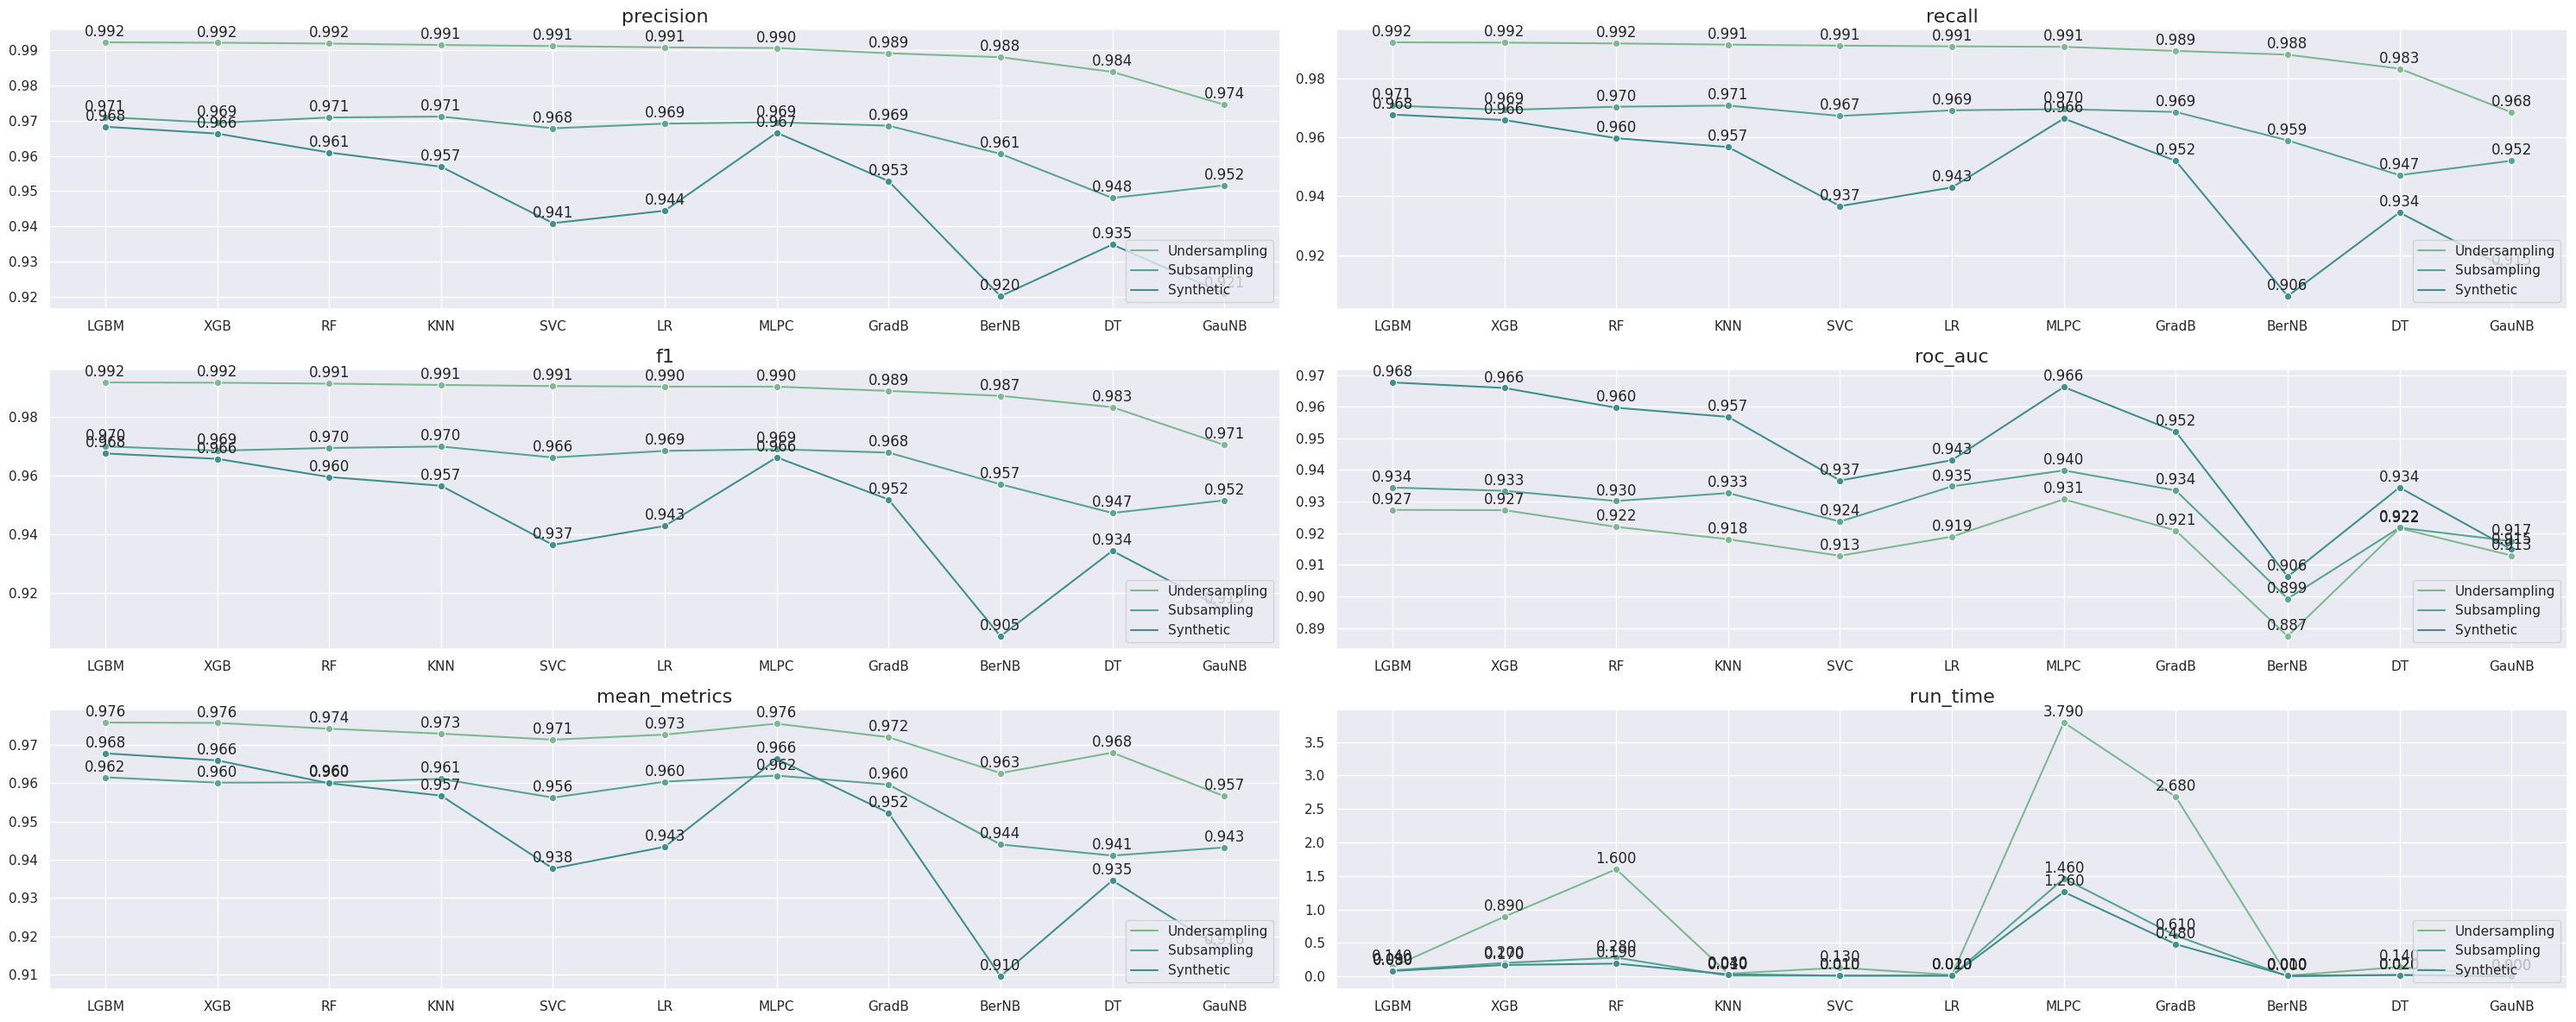

In [49]:
columns = ['precision', 'recall', 'f1', 'roc_auc', 'mean_metrics', 'run_time']

fig, axs = plt.subplots(3,2, figsize=(30,12))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.lineplot(data=result, x='Algorithm', y=col, hue='Method',marker='o', ax=axs[i])
    axs[i].set(xlabel='', ylabel='')
    axs[i].set_title(label =col, fontsize=16)
    axs[i].legend(loc='lower right')
    for line in axs[i].lines:
        x, y = line.get_data()
        for xi, yi in zip(x, y):
            axs[i].annotate(format(yi, '.3f'), (xi, yi), textcoords='offset points', xytext=(0,5), ha='center')

plt.tight_layout()

## Hyper Parameter Tunning
*We have identified the three best performing algorithms as **RF**, **LGBM**, and **XGB**. These algorithms were trained using undersampling techniques*

#### In order to further improve the performance of these algorithms, we will now focus on Hyper Parameter Tuning. 
**Hyperparameters** are parameters that are not learned during the training process but are set prior to training. Tuning these hyperparameters can significantly improve the performance of the model.

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
def hyper_parameter_tunning(X, y, model, parameter_space):
  start_time = time.time()
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
  clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=cv, scoring='f1')
  clf.fit(X, y)
  print(f'finished!!! {round((time.time() - start_time) / 60, 2)} min(s).')
  # Best paramete set
  print('Best parameters found:\n', clf.best_params_)

### LGBM Undersampled
- **`boosting_type`**: set to **`gbdt`** for gradient boosting decision tree, which is the default and a good starting point.
- **`num_leaves`**: the maximum number of leaves in one tree, can affect both training time and model performance. We try a few different values that are not too large to avoid overfitting and not too small to avoid underfitting.
- **`max_depth`**: the maximum depth of each decision tree. We try a range of values, including no maximum depth (**`1`**), to see if the model benefits from a deeper tree structure or if it overfits.
- **`learning_rate`**: the step size shrinkage used in updating weights of trees, smaller values can help avoid overfitting. We try a few different values to find a good trade-off between model complexity and performance.
- **`n_estimators`**: the number of boosted trees to fit. We try different values to see if the model benefits from more trees or if it starts to overfit.
- **`min_child_samples`**: the minimum number of samples required to be at a leaf node, can affect the smoothness of the model and reduce overfitting. We try a few different values.
- **`class_weight`**: the weights to assign to each class, which can help handle the class imbalance problem. We try different ratios between the minority and majority class, with 1 representing equal weight and larger values giving more weight to the minority class.

In [52]:
algorithms['LGBM']

LGBMClassifier(random_state=0)

In [53]:
lgbm_params = params_lgbm = {
    'boosting_type': ['gbdt'],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [20, 50, 100],
    'class_weight': [{0: 1, 1: w} for w in [1, 5, 10, 20, 50]]
}

In [54]:
#hyper_parameter_tunning(X_under, y_under, algorithms['LGBM'], lgbm_params)

finished!!! 146.62 min(s).
```
Best parameters found:
 {'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 10}, 'learning_rate': 0.5, 'max_depth': -1, 'min_child_samples': 50, 'n_estimators': 200, 'num_leaves': 31}
```

### RF Undersampled
- **`n_estimators`**: the number of decision trees in the forest. We consider three possible values to test different sizes of the ensemble.
- **`max_features`**: the number of features to consider when looking for the best split. We test two possible values, 'sqrt' and 'log2', which correspond to the square root and logarithm base 2 of the number of features, respectively.
- **`max_depth`**: the maximum depth of the decision trees. We test three possible values to control the complexity of the trees and avoid overfitting.
- **`min_samples_split`**: the minimum number of samples required to split an internal node. We test three possible values to control the granularity of the splits.
- **`min_samples_leaf`**: the minimum number of samples required to be at a leaf node. We test three possible values to control the granularity of the final predictions.
- **`class_weight`**: the weight of each class in the loss function. We test three possible values: 'balanced' to automatically adjust the weights inversely proportional to the class frequencies, {0:1, 1:2} to assign a weight of 1 to the majority class and 2 to the minority class, and {0:1, 1:3} to assign a weight of 1 to the majority class and 3 to the minority class. We use this parameter to handle the imbalanced class distribution and give more importance to the minority class.

In [55]:
algorithms['RF']

RandomForestClassifier(random_state=0)

In [56]:
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:3}]
}

In [57]:
#hyper_parameter_tunning(X_under, y_under, algorithms['RF'], rf_params)

finished!!! 87.46 min(s).
```
Best parameters found:
 {'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
```

### XGB Undersampled
- **`learning_rate`**: learning rate for gradient boosting. It controls the step size at each iteration.
- **`n_estimators`**: number of trees to build. Increasing the number of trees improves model performance but also increases computation time.
- **`max_depth`**: maximum depth of a tree. A deeper tree can capture more complex relationships but can lead to overfitting.
- **`gamma`**: minimum loss reduction required to make a split. A larger value leads to fewer splits and a more conservative model.
- **`subsample`**: subsample ratio of the training instance. A smaller value introduces more randomness and can reduce overfitting.
- **`colsample_bytree`**: subsample ratio of columns when constructing each tree. A smaller value introduces more randomness and can reduce overfitting.
- **`scale_pos_weight`**: control the balance of positive and negative weights, used for unbalanced classes.
- **`eval_metric`**: metric used for evaluation during training. Here we use **`aucpr`**, the area under the precision-recall curve, as it is a better metric for imbalanced data than AUC-ROC.

In [58]:
algorithms['XGB']

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [59]:
xgb_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'scale_pos_weight': [492/9348],
    'eval_metric': ['aucpr']
}


In [60]:
#hyper_parameter_tunning(X_under, y_under, algorithms['XGB'], xgb_params)

finished!!! 87.16 min(s).
```
Best parameters found:
 {'colsample_bytree': 1.0, 'eval_metric': 'aucpr', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'scale_pos_weight': 0.05263157894736842, 'subsample': 1.0}
```

# Optimized Algorithms Performace


LGBM
```
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 10}, 'learning_rate': 0.5, 'max_depth': -1, 'min_child_samples': 50, 'n_estimators': 200, 'num_leaves': 31}
```
RF
```
 {'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
 ```

XGB
```
 {'colsample_bytree': 1.0, 'eval_metric': 'aucpr', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'scale_pos_weight': 0.05263157894736842, 'subsample': 1.0}
```

In [61]:
algorithms = {
    'Best LGBM': LGBMClassifier(random_state=0,
                          boosting_type='gbdt',
                           class_weight={0: 1, 1: 10},
                           learning_rate=0.5,
                           max_depth=-1,
                           min_child_samples=50,
                           n_estimators=200,
                           num_leaves=31
                           ),
    'Best RF': RandomForestClassifier(random_state=0,
                                      class_weight='balanced',
                                      max_depth=8,
                                      max_features='sqrt',
                                      min_samples_leaf=2,
                                      min_samples_split=5,
                                      n_estimators=200                     
                          ),
    'Best XGB': XGBClassifier(random_state=0,
                         colsample_bytree=1,
                         eval_metric='aucpr',
                         gamma=0,
                         learning_rate=0.1,
                         max_depth=5,
                         n_estimators=1000,
                         scale_pos_weight=0.05263157894736842,
                         subsample=1
                         )
}

In [62]:
otimized_results = test_algorithms(X_under, y_under)

Best LGBM...finished!!! 0.13 min(s).
Best RF...finished!!! 1.61 min(s).
Best XGB...finished!!! 3.63 min(s).


In [63]:
otimized_results['Method'] = 'Undersampling'
otimized_results['mean_metrics'] = otimized_results[metrics].mean(axis=1)
result = pd.concat([result, otimized_results], axis=0)

In [64]:
result.set_index([ 'Method', 'Algorithm' ]).sort_values(by='f1', ascending=False).drop('model', axis=1)

precision   recall       f1  roc_auc run_time  \
Method        Algorithm                                                 
Undersampling LGBM         0.9921  0.99214  0.99186  0.92736     0.14   
              XGB         0.99199  0.99204  0.99176  0.92729     0.89   
              Best RF     0.99202  0.99204  0.99175  0.92558     1.61   
              Best LGBM   0.99189  0.99197  0.99171  0.92842     0.13   
              RF          0.99176  0.99177  0.99145  0.92199      1.6   
              Best XGB    0.99149  0.99146  0.99109  0.91672     3.63   
              KNN         0.99135  0.99136    0.991   0.9181     0.04   
              SVC         0.99104  0.99102  0.99061  0.91285     0.13   
              LR          0.99068  0.99079  0.99045  0.91891     0.02   
              MLPC        0.99049  0.99062  0.99042  0.93073     3.79   
              GradB       0.98901  0.98923  0.98897  0.92086     2.68   
              BerNB        0.9879  0.98797  0.98729   0.8874     0.01   
              DT          0.98374  0.98323  0.98343  0.92157     0.14   
              GauNB       0.97446  0.96843  0.97058  0.91294      0.0   
Subsampling   LGBM        0.97095  0.97073  0.97008  0.93443     0.09   
              KNN          0.9711  0.97073  0.97003   0.9327     0.01   
              RF          0.97083  0.97033  0.96954  0.93017     0.28   
              MLPC        0.96949  0.96951  0.96911  0.93986     1.46   
              XGB         0.96932  0.96924  0.96861  0.93341      0.2   
              LR          0.96911  0.96911  0.96855  0.93481     0.01   
              GradB       0.96852  0.96856  0.96796  0.93352     0.61   
Synthetic     LGBM        0.96822  0.96767  0.96766  0.96769     0.08   
              MLPC        0.96654  0.96633  0.96633  0.96623     1.26   
Subsampling   SVC         0.96778  0.96721  0.96629  0.92367     0.01   
Synthetic     XGB         0.96629  0.96583  0.96583  0.96594     0.17   
              RF          0.96093  0.95967  0.95965  0.95969     0.19   
Subsampling   BerNB       0.96055  0.95894  0.95717   0.8993      0.0   
Synthetic     KNN         0.95692  0.95667  0.95667  0.95679     0.03   
              GradB       0.95285    0.952  0.95198  0.95213     0.48   
Subsampling   GauNB       0.95165  0.95203  0.95167  0.91748      0.0   
              DT          0.94807  0.94715  0.94739  0.92174     0.02   
Synthetic     LR          0.94447    0.943  0.94297   0.9431     0.01   
              SVC         0.94095  0.93667  0.93652  0.93666     0.01   
              DT           0.9349   0.9345  0.93449  0.93446     0.02   
              GauNB       0.92107  0.91483  0.91453  0.91487      0.0   
              BerNB        0.9203  0.90617   0.9054  0.90625     0.01   

                         mean_metrics  
Method        Algorithm                
Undersampling LGBM           0.975865  
              XGB            0.975770  
              Best RF        0.975348  
              Best LGBM      0.975997  
              RF             0.974243  
              Best XGB       0.972690  
              KNN            0.972952  
              SVC            0.971380  
              LR             0.972707  
              MLPC           0.975565  
              GradB          0.972017  
              BerNB          0.962640  
              DT             0.967993  
              GauNB          0.956603  
Subsampling   LGBM           0.961547  
              KNN            0.961140  
              RF             0.960217  
              MLPC           0.961993  
              XGB            0.960145  
              LR             0.960395  
              GradB          0.959640  
Synthetic     LGBM           0.967810  
              MLPC           0.966357  
Subsampling   SVC            0.956237  
Synthetic     XGB            0.965972  
              RF             0.959985  
Subsampling   BerNB          0.943990  
Synthetic     KNN            0.956762  
              GradB          0.952240  
Subsampli

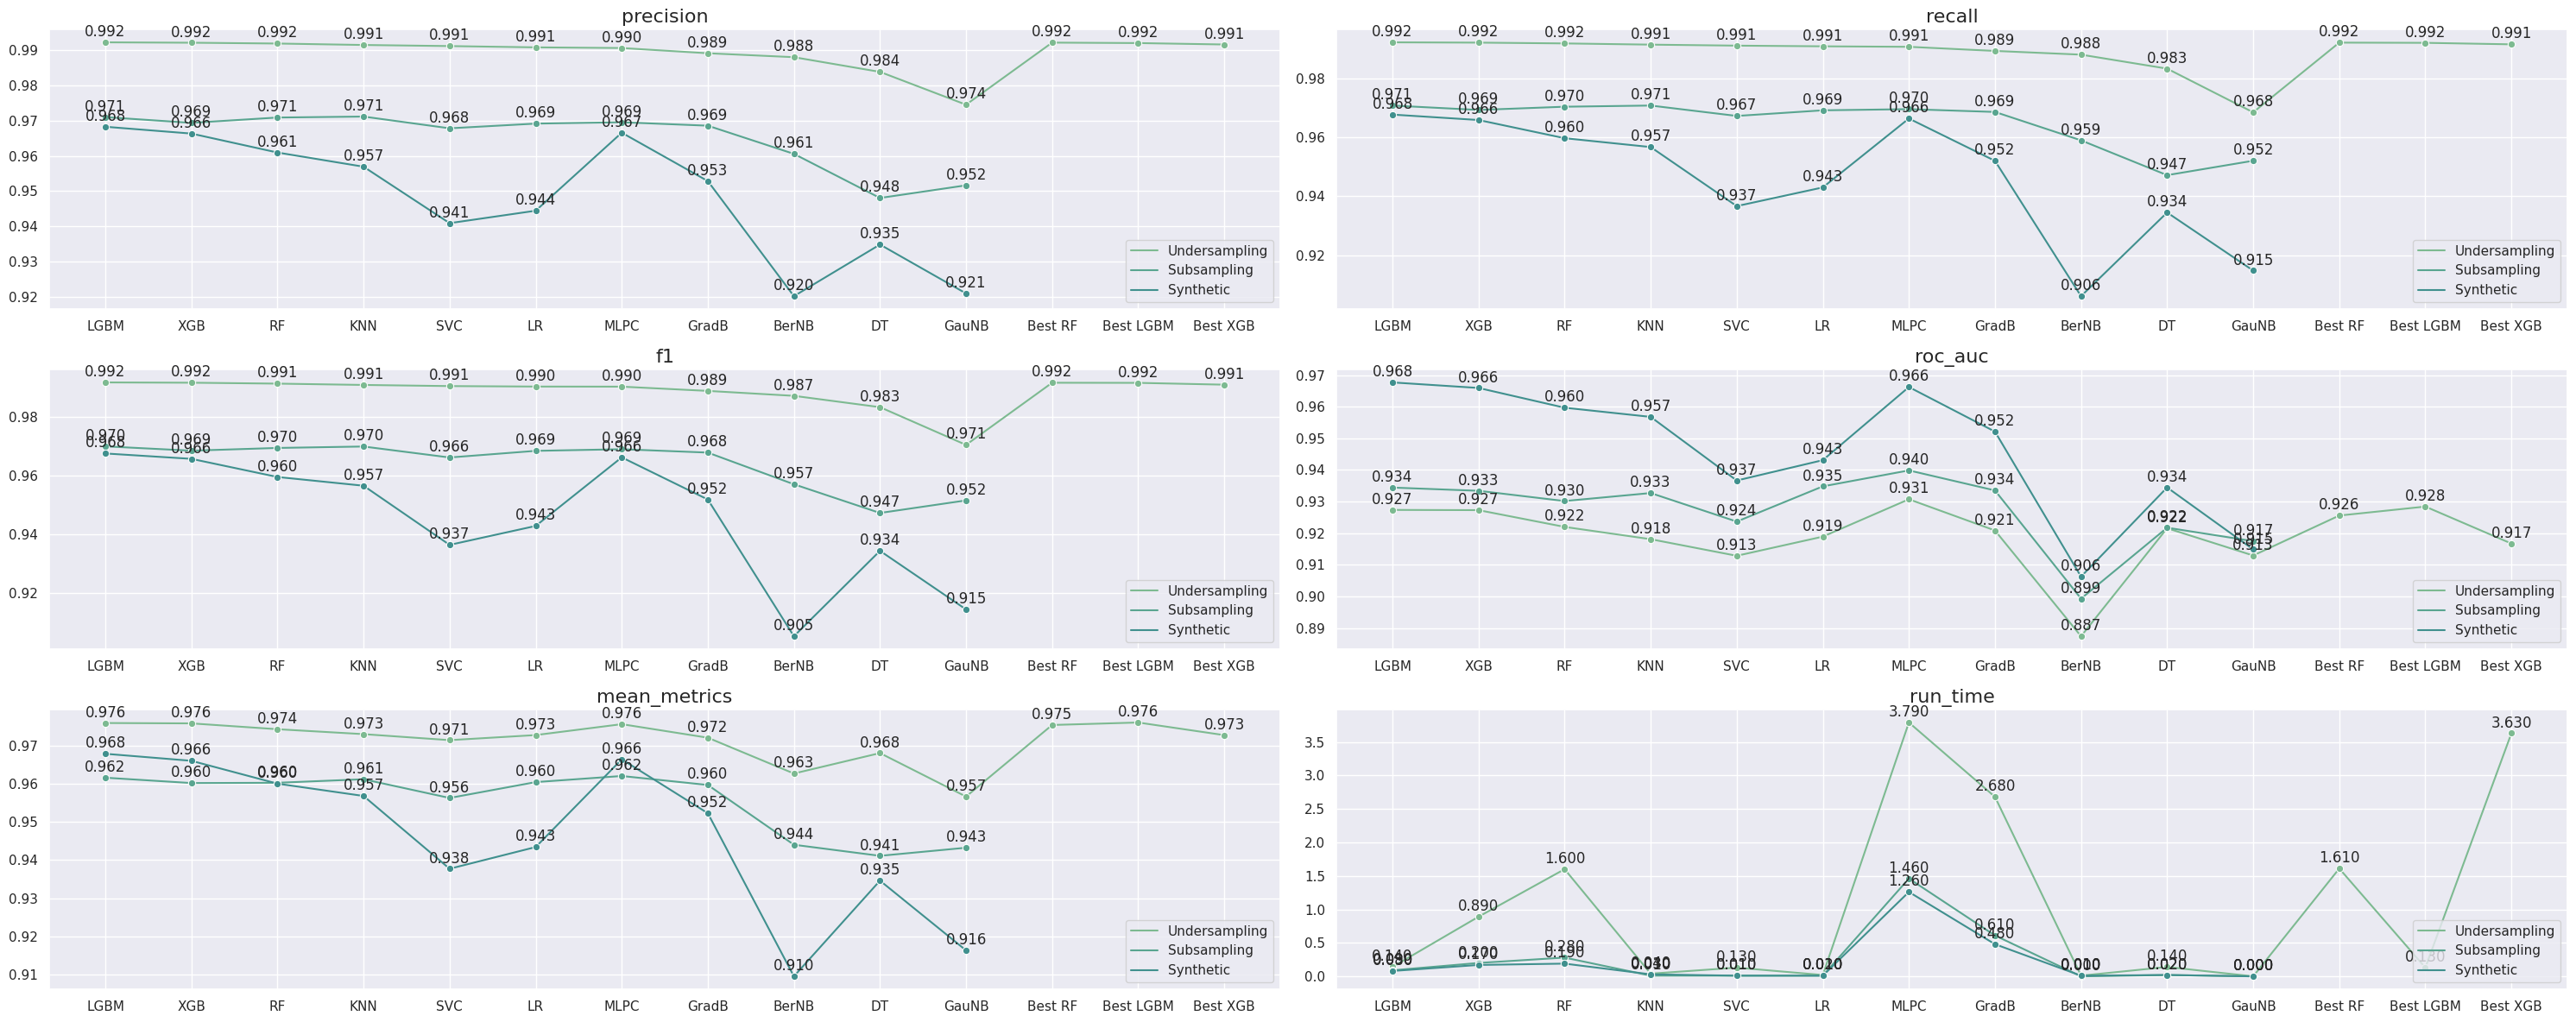

In [65]:
fig, axs = plt.subplots(3,2, figsize=(30,12))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.lineplot(data=result, x='Algorithm', y=col, hue='Method',marker='o', ax=axs[i])
    axs[i].set(xlabel='', ylabel='')
    axs[i].set_title(label =col, fontsize=16)
    axs[i].legend(loc='lower right')
    for line in axs[i].lines:
        x, y = line.get_data()
        for xi, yi in zip(x, y):
            axs[i].annotate(format(yi, '.3f'), (xi, yi), textcoords='offset points', xytext=(0,5), ha='center')

plt.tight_layout()

# Conclusion
In this project, we performed hyperparameter tuning for the LGBM, RF, and XGB algorithms in the Credit Fraud Detection problem provided by Kaggle. The tests showed that there were no significant changes in performance compared to the default algorithm, indicating that any of these algorithms can be used to predict the target variable.



#Acknowledgements
I would like to express my gratitude to Kaggle for providing this interesting Credit Fraud Detection project. I would also like to thank the community for their valuable feedback and support during the development of this project.

#Feedback
If you have any comments, suggestions or feedback about this project, please feel free to share them. I am open to criticism and welcome any suggestions that can help me improve my skills and future projects.